# Test Set Evaluations for all Experiments

## Loading Trained Models and Evaluation Code

In [1]:
import RVQE
import torch
torch.set_num_threads(2)

from math import sqrt

In [2]:
# mock definitions
command_train = None
command_resume = None

In [3]:
def strip_module_prefix_from_state_dict(state_dict: dict) -> dict:
    return {
        key[7:]: value
        for key, value in state_dict.items()
    }

def load_model_and_dataset(path: str) -> (RVQE.model.RVQE, RVQE.datasets.DataFactory):
    store = torch.load(path)
    
    original_args = store["_original_args"]
    dataset = RVQE.datasets.all_datasets[original_args.dataset](0, **vars(original_args))
    model = RVQE.model.RVQE(
        workspace_size=original_args.workspace,
        input_size=dataset.input_width,
        stages=original_args.stages,
        order=original_args.order,
        degree=original_args.degree,
        bias=original_args.initial_bias,
    )
    model.load_state_dict(strip_module_prefix_from_state_dict(store["model_state_dict"]))
    model.eval()
    
    return model, dataset

In [4]:
def test_model(model: RVQE.model.RVQE, dataset: RVQE.datasets.DataFactory, *, batches: int) -> dict:
    rates = []
    for _ in range(batches):
        sentences, targets = dataset.next_batch(0, RVQE.datasets.TrainingStage.TEST)
        measured_probs, measured_sequences, min_postsel_prob = model(sentences, targets, postselect_measurement=dataset.ignore_output_at_step)
        rates.append(RVQE.data.character_error_rate(
            dataset.filter(measured_sequences, dim_sequence=1),
            dataset.filter(RVQE.data.skip_first(targets), dim_sequence=1)
        ))
    rates = torch.stack(rates)
    return {
        "mean": rates.mean(),
        "std": rates.std() / sqrt(len(rates))  # standard deviation of the mean
    }

## MNIST 0, 1

In [10]:
!ls -t results/best/mnist01

checkpoint--experiment-mnist01-35557-mnist01--6c0e97--2020-05-28--05-27-44.tar
checkpoint--experiment-mnist01-35557-mnist01--6c0e97--2020-05-28--09-47-01.tar
checkpoint--experiment-mnist01-35675-mnist01--81f3e3--2020-05-28--07-18-38.tar
checkpoint--experiment-mnist01-35675-mnist01--81f3e3--2020-05-28--08-40-54.tar


In [6]:
model, dataset = load_model_and_dataset("../results/best/mnist01/checkpoint--experiment-mnist01-35557-mnist01--6c0e97--2020-05-28--09-47-01.tar")

In [12]:
test_model(model, dataset, batches=10)

{'mean': tensor(0.0140, dtype=torch.float64),
 'std': tensor(0.0040, dtype=torch.float64)}

In [13]:
model, dataset = load_model_and_dataset("../results/best/mnist01/checkpoint--experiment-mnist01-35675-mnist01--81f3e3--2020-05-28--08-40-54.tar")

In [14]:
test_model(model, dataset, batches=10)

{'mean': tensor(0.0140, dtype=torch.float64),
 'std': tensor(0.0048, dtype=torch.float64)}

## MNIST 3, 6

In [15]:
!ls -t results/best/mnist36

checkpoint--experiment-mnist36-23407-mnist36-ds--c6d15f--2020-05-29--09-17-52.tar
checkpoint--experiment-mnist36-23407-mnist36-ds--c6d15f--2020-05-29--09-23-00.tar
checkpoint--experiment-mnist36-24830-mnist36-ds--b82b01--2020-05-29--00-20-14.tar
checkpoint--experiment-mnist36-24830-mnist36-ds--b82b01--2020-05-29--02-24-23.tar
checkpoint--experiment-mnist36-88743-mnist36-ds--22bb4f--2020-05-29--09-11-08.tar
checkpoint--experiment-mnist36-88743-mnist36-ds--22bb4f--2020-05-29--09-15-41.tar


In [16]:
model, dataset = load_model_and_dataset("../results/best/mnist36/checkpoint--experiment-mnist36-23407-mnist36-ds--c6d15f--2020-05-29--09-17-52.tar")

In [17]:
test_model(model, dataset, batches=10)

{'mean': tensor(0.1030, dtype=torch.float64),
 'std': tensor(0.0062, dtype=torch.float64)}

In [18]:
model, dataset = load_model_and_dataset("../results/best/mnist36/checkpoint--experiment-mnist36-24830-mnist36-ds--b82b01--2020-05-29--00-20-14.tar")

In [19]:
test_model(model, dataset, batches=10)

{'mean': tensor(0.1100, dtype=torch.float64),
 'std': tensor(0.0089, dtype=torch.float64)}

In [23]:
model, dataset = load_model_and_dataset("../results/best/mnist36/checkpoint--experiment-mnist36-88743-mnist36-ds--22bb4f--2020-05-29--09-11-08.tar")

In [24]:
test_model(model, dataset, batches=30)

{'mean': tensor(0.1043, dtype=torch.float64),
 'std': tensor(0.0055, dtype=torch.float64)}

## MNIST All Digits

In [71]:
!ls -t results/best/mnist-tsne

checkpoint--experiment-pool-mnist-tsne-d2-r5-27489-mnist-tsne-d2-r5--0fed81--2020-06-02--00-43-51.tar
checkpoint--experiment-pool-mnist-tsne-d2-r5-31509-mnist-tsne-d2-r5--f7cb3b--2020-06-02--14-25-29.tar
checkpoint--experiment-pool-mnist-tsne-d2-r5-25969-mnist-tsne-d2-r5--7e2c9e--2020-06-02--11-06-52.tar


In [72]:
model, dataset = load_model_and_dataset("../results/best/mnist-tsne/checkpoint--experiment-pool-mnist-tsne-d2-r5-25969-mnist-tsne-d2-r5--7e2c9e--2020-06-02--11-06-52.tar")

In [68]:
test_model(model, dataset, batches=10)

{'mean': tensor(0.0541, dtype=torch.float64),
 'std': tensor(0.0040, dtype=torch.float64)}

## MNIST Generative

In [5]:
import matplotlib.pyplot as plt
from glob import glob

In [6]:
!ls -t results/best/mnist-gen

checkpoint--experiment-mnist01-93806-mnist01-gen--9be880--2020-05-22--23-15-50.tar
checkpoint--experiment-mnist01-87583-mnist01-gen--ba1adb--2020-05-23--02-55-33.tar
checkpoint--experiment-mnist01-83502-mnist01-gen--7125e7--2020-05-23--08-28-58.tar
checkpoint--experiment-mnist01-83224-mnist01-gen--52d741--2020-05-23--11-38-51.tar
checkpoint--experiment-mnist01-78119-mnist01-gen--17ee45--2020-05-22--23-45-58.tar
checkpoint--experiment-mnist01-76720-mnist01-gen--40dbb3--2020-05-23--02-25-50.tar
checkpoint--experiment-mnist01-75343-mnist01-gen--58d805--2020-05-23--10-49-35.tar
checkpoint--experiment-mnist01-74155-mnist01-gen--85ae5a--2020-05-22--23-05-03.tar
checkpoint--experiment-mnist01-71350-mnist01-gen--947db9--2020-05-23--12-44-39.tar
checkpoint--experiment-mnist01-69520-mnist01-gen--4a3e2b--2020-05-23--11-18-56.tar
checkpoint--experiment-mnist01-65123-mnist01-gen--f037ed--2020-05-23--03-25-15.tar
checkpoint--experiment-mnist01-64490-mnist01-gen--2d4ae9--2020-05-23--08-57-51.tar
chec

In [18]:
def show_images(images: list, filename: str):
    n = len(images)
    fig = plt.figure()
        
    for i in range(n):
        # Debug, plot figure
        ax = fig.add_subplot(1, n, i + 1)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(images[i], cmap="gray", vmin=0, vmax=2)

    plt.show(block=True)
    fig.savefig(filename)

In [19]:
def toimage(measured_seq):
    A, B = measured_seq.T
    A = torch.cat([torch.zeros(1), A.float()]).reshape(10, 10)
    B = torch.cat([torch.zeros(1), B.float()]).reshape(10, 10).T
    
    return A + B

def gen_model(model: RVQE.model.RVQE, dataset: RVQE.datasets.DataFactory, *, samples: int) -> dict:
    seqs = []
    for s in range(samples):
        sentences, targets = dataset.next_batch(0, RVQE.datasets.TrainingStage.TEST)
        
        # up front are 0s
        if s % 2 == 0:
            sentences = sentences[:1]
            targets = targets[:1]
        else:
            sentences = sentences[-1:]
            targets = targets[-1:]
            
        _, measured_sequences, _ = model(sentences, targets, postselect_measurement=dataset.ignore_output_at_step)
        seqs.append(toimage(measured_sequences[0]))
        
    return seqs

results/best/mnist-gen/checkpoint--experiment-mnist01-83224-mnist01-gen--52d741--2020-05-23--11-38-51.tar


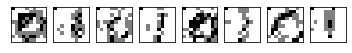

results/best/mnist-gen/checkpoint--experiment-mnist01-62339-mnist01-gen--1b3af5--2020-05-23--08-40-00.tar


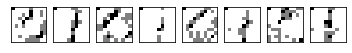

results/best/mnist-gen/checkpoint--experiment-mnist01-23424-mnist01-gen--b18d9f--2020-05-23--15-55-41.tar


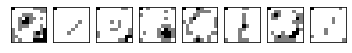

results/best/mnist-gen/checkpoint--experiment-mnist01-40797-mnist01-gen--5a42c0--2020-05-22--19-14-33.tar


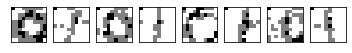

results/best/mnist-gen/checkpoint--experiment-mnist01-64490-mnist01-gen--2d4ae9--2020-05-23--08-57-51.tar


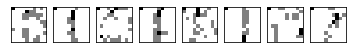

results/best/mnist-gen/checkpoint--experiment-mnist-gen-20001-mnist01-gen--a7fd5c--2020-05-22--16-18-07.tar


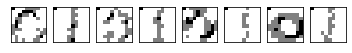

results/best/mnist-gen/checkpoint--experiment-mnist-gen-20002-mnist01-gen--c9147c--2020-05-22--16-10-26.tar


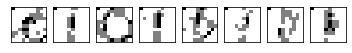

results/best/mnist-gen/checkpoint--experiment-mnist01-47611-mnist01-gen--a788f2--2020-05-23--11-52-33.tar


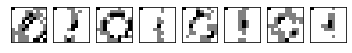

results/best/mnist-gen/checkpoint--experiment-mnist01-28847-mnist01-gen--246e72--2020-05-23--02-35-27.tar


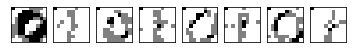

results/best/mnist-gen/checkpoint--experiment-mnist01-83502-mnist01-gen--7125e7--2020-05-23--08-28-58.tar


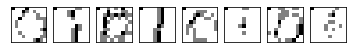

results/best/mnist-gen/checkpoint--experiment-mnist01-65123-mnist01-gen--f037ed--2020-05-23--03-25-15.tar


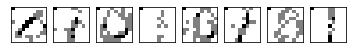

results/best/mnist-gen/checkpoint--experiment-mnist01-17796-mnist01-gen--b7f88c--2020-05-23--14-20-17.tar


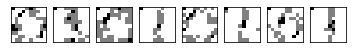

results/best/mnist-gen/checkpoint--experiment-mnist01-51801-mnist01-gen--bde9e0--2020-05-23--10-42-32.tar


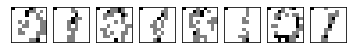

results/best/mnist-gen/checkpoint--experiment-mnist01-74155-mnist01-gen--85ae5a--2020-05-22--23-05-03.tar


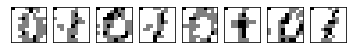

results/best/mnist-gen/checkpoint--experiment-mnist01-54785-mnist01-gen--d78b97--2020-05-23--02-15-16.tar


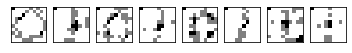

results/best/mnist-gen/checkpoint--experiment-mnist-gen-20004-mnist01-gen--004ff1--2020-05-22--17-20-59.tar


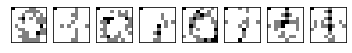

results/best/mnist-gen/checkpoint--experiment-mnist01-69520-mnist01-gen--4a3e2b--2020-05-23--11-18-56.tar


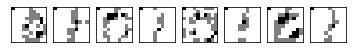

results/best/mnist-gen/checkpoint--experiment-mnist01-35675-mnist01-gen--96b77c--2020-05-23--06-38-09.tar


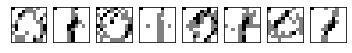

results/best/mnist-gen/checkpoint--experiment-mnist01-93806-mnist01-gen--9be880--2020-05-22--23-15-50.tar


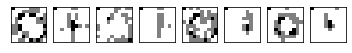

results/best/mnist-gen/checkpoint--experiment-mnist01-47253-mnist01-gen--9eb50f--2020-05-23--16-22-30.tar


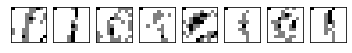

results/best/mnist-gen/checkpoint--experiment-mnist-gen-20003-mnist01-gen--bee13c--2020-05-22--16-19-39.tar


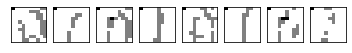

results/best/mnist-gen/checkpoint--experiment-mnist01-52495-mnist01-gen--fc63cb--2020-05-23--14-34-49.tar


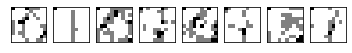

results/best/mnist-gen/checkpoint--experiment-mnist01-35557-mnist01-gen--f7a984--2020-05-23--04-52-28.tar


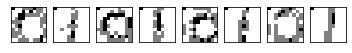

results/best/mnist-gen/checkpoint--experiment-mnist01-87583-mnist01-gen--ba1adb--2020-05-23--02-55-33.tar


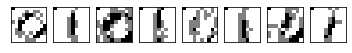

results/best/mnist-gen/checkpoint--experiment-mnist01-51422-mnist01-gen--f3d98b--2020-05-23--08-59-59.tar


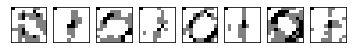

results/best/mnist-gen/checkpoint--experiment-mnist01-71350-mnist01-gen--947db9--2020-05-23--12-44-39.tar


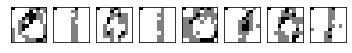

results/best/mnist-gen/checkpoint--experiment-mnist01-46386-mnist01-gen--9f74e7--2020-05-23--01-09-14.tar


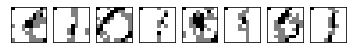

results/best/mnist-gen/checkpoint--experiment-mnist01-75343-mnist01-gen--58d805--2020-05-23--10-49-35.tar


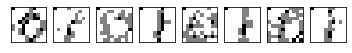

results/best/mnist-gen/checkpoint--experiment-mnist01-19342-mnist01-gen--dc526c--2020-05-23--00-53-29.tar


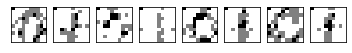

results/best/mnist-gen/checkpoint--experiment-mnist01-63763-mnist01-gen--57cbdc--2020-05-23--12-57-57.tar


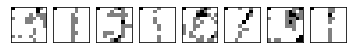

results/best/mnist-gen/checkpoint--experiment-mnist01-78119-mnist01-gen--17ee45--2020-05-22--23-45-58.tar


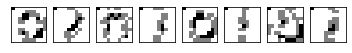

results/best/mnist-gen/checkpoint--experiment-mnist01-76720-mnist01-gen--40dbb3--2020-05-23--02-25-50.tar


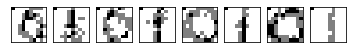

results/best/mnist-gen/checkpoint--experiment-mnist01-28722-mnist01-gen--e680c6--2020-05-23--02-02-18.tar


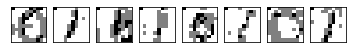

results/best/mnist-gen/checkpoint--experiment-mnist01-38358-mnist01-gen--8e57f0--2020-05-23--08-08-14.tar


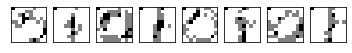

In [21]:
for fn in glob("../results/best/mnist-gen/*.tar"):
    print(fn)
    model, dataset = load_model_and_dataset(fn)
    foo = gen_model(model, dataset, samples=8)
    show_images(foo, f"{fn}.pdf")